Principais bibliotecas abordadas durante o curso

In [1]:
import sklearn
import math
import numpy as np 
import scipy as scp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import random
import statistics as st
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm,expon
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
import cufflinks as cf
from plotly.offline import plot, iplot

plt.style.use('ggplot')


In [2]:
df = pd.read_csv('Family Income and Expenditure.csv')

Nosso projeto baseia-se na avaliação de dados da Pesquisa de Renda e Despesa Familiar da Filipinas. Foi feita uma amostragem de 100 elementos da base de dados por meio do "sample".

In [3]:
sample_df = df.sample(100)

In [4]:
sample_df.head(3)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
32948,127840,XII - SOCCSKSARGEN,85981,Wage/Salaries,1,46142,43036,5232,10406,1290,...,0,0,0,0,0,1,0,0,0,0
41058,89147,XI - Davao Region,60023,Enterpreneurial Activities,2,24465,14884,2176,7326,2570,...,0,0,0,0,0,1,0,0,0,0
8258,276130,V - Bicol Region,80352,Enterpreneurial Activities,0,14609,11298,22454,20931,2686,...,1,0,0,0,0,3,0,0,0,1


As variáveis quantitativas não apresentam valores nulos

In [5]:
sample_df.isnull().sum()

Total Household Income                            0
Region                                            0
Total Food Expenditure                            0
Main Source of Income                             0
Agricultural Household indicator                  0
Bread and Cereals Expenditure                     0
Total Rice Expenditure                            0
Meat Expenditure                                  0
Total Fish and  marine products Expenditure       0
Fruit Expenditure                                 0
Vegetables Expenditure                            0
Restaurant and hotels Expenditure                 0
Alcoholic Beverages Expenditure                   0
Tobacco Expenditure                               0
Clothing, Footwear and Other Wear Expenditure     0
Housing and water Expenditure                     0
Imputed House Rental Value                        0
Medical Care Expenditure                          0
Transportation Expenditure                        0
Communicatio

Foram isoladas as variáveis do dataframe e armazenadas em "var_quant"

In [6]:
var_quant = sample_df[['Total Household Income', 'Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Number of Refrigerator/Freezer', 'Communication Expenditure']]

In [7]:
var_quant

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Number of Refrigerator/Freezer,Communication Expenditure
32948,127840,85981,46142,43036,5232,10406,1290,5210,4002,0,888
41058,89147,60023,24465,14884,2176,7326,2570,2509,9100,0,1722
8258,276130,80352,14609,11298,22454,20931,2686,6084,2120,1,1680
13328,238647,105312,27356,20520,14004,10813,1365,8335,27490,1,3000
16332,268516,113239,19914,11060,20040,21172,2670,6890,18100,1,3642
...,...,...,...,...,...,...,...,...,...,...,...
1683,251846,125806,34786,17080,22660,5068,1741,5370,35660,0,4680
16514,698754,180427,24257,17600,40364,30164,11503,15835,11550,3,16782
27412,210110,120413,32502,27876,17150,20662,2210,7509,17422,0,2286
6925,264445,80013,28174,25078,5754,22061,3340,3185,4065,1,576


A dieta das famílias filipinas parece ser em sua maior parte em pães e cereais, levando em consideração os gastos totais. As famílias tendem a gastar igualmente em carnes e peixes

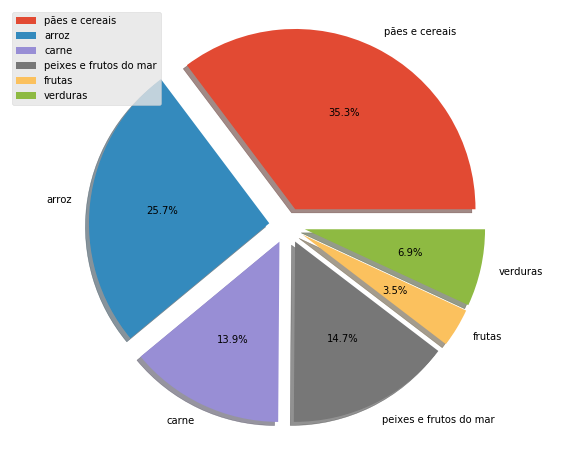

In [8]:
%matplotlib inline

gastos = [var_quant['Bread and Cereals Expenditure'].sum(), var_quant['Total Rice Expenditure'].sum(), var_quant['Meat Expenditure'].sum(), var_quant['Total Fish and  marine products Expenditure'].sum(), var_quant['Fruit Expenditure'].sum(), var_quant['Vegetables Expenditure'].sum()]
labels = ['pães e cereais', 'arroz', 'carne', 'peixes e frutos do mar', 'frutas', 'verduras']


explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 

plt.figure(figsize =(10,8))
plt.pie(gastos, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
plt.legend(labels, loc=2)

plt.axis('equal')

plt.show()

Foram avaliadas as distribuições das variáveis quantitativas e sua simetria

Os dados que apresentaram-se mais simetricos (assimetria mais próxima de 0) foram os gastos com pão e arroz. Todos os outros dados são relativamente assimétricos

<IPython.core.display.Javascript object>


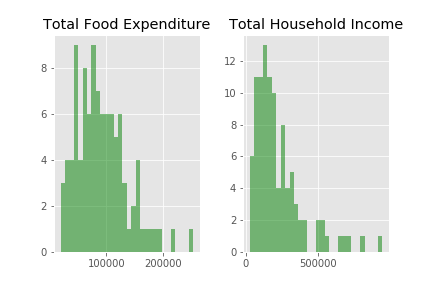

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24a95b90>,
      dtype=object)

In [65]:
%matplotlib notebook
var_quant[['Total Household Income','Total Food Expenditure']].hist(bins=30, alpha=0.5, color='Green')


In [10]:
var_quant['Total Household Income'].skew()

1.8708444017022836

In [11]:
var_quant['Total Food Expenditure'].skew()

0.8927103439402918

<IPython.core.display.Javascript object>


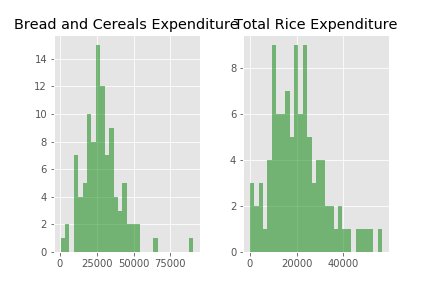

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c265601d0>,
      dtype=object)

In [64]:
%matplotlib notebook
var_quant[['Bread and Cereals Expenditure','Total Rice Expenditure']].hist(bins=30, alpha=0.5, color='Green')

In [13]:
var_quant['Bread and Cereals Expenditure'].skew()

1.2545211770890456

In [14]:
var_quant['Total Rice Expenditure'].skew()

0.752820514747296

<IPython.core.display.Javascript object>


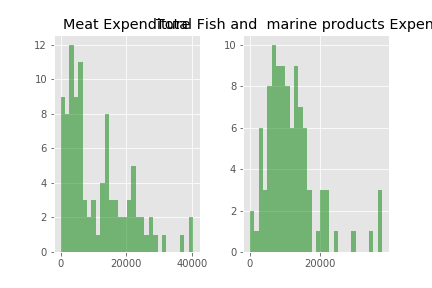

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2619fcd0>,
      dtype=object)

In [63]:
%matplotlib notebook
var_quant[['Meat Expenditure','Total Fish and  marine products Expenditure']].hist(bins=30, alpha=0.5, color='Green')

In [16]:
var_quant['Meat Expenditure'].skew()

1.005390565760598

In [17]:
var_quant['Total Fish and  marine products Expenditure'].skew()

1.6128157775720298

<IPython.core.display.Javascript object>


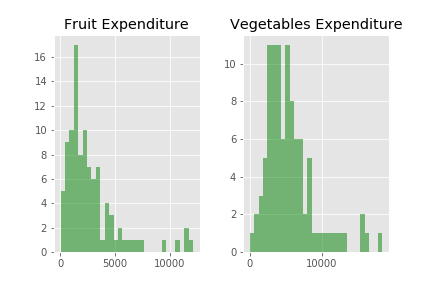

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25f7bb90>,
      dtype=object)

In [62]:
%matplotlib notebook
var_quant[['Fruit Expenditure','Vegetables Expenditure']].hist(bins=30, alpha=0.5, color='Green')

In [19]:
var_quant['Fruit Expenditure'].skew()

2.0494646803609347

In [20]:
var_quant['Vegetables Expenditure'].skew()

1.5579781396797039

<IPython.core.display.Javascript object>


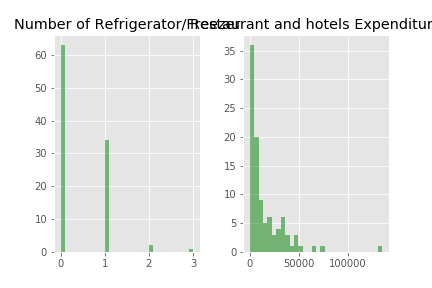

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25eb6490>,
      dtype=object)

In [61]:
%matplotlib notebook
var_quant[['Restaurant and hotels Expenditure','Number of Refrigerator/Freezer']].hist(bins=30, alpha=0.5, color='Green')

In [22]:
var_quant['Restaurant and hotels Expenditure'].skew()

2.989868309155694

In [23]:
var_quant['Communication Expenditure'].skew()

2.397303298976011

Foi avaliada também a correlação entre os dados e as variáveis que mais se mostraram correlacionadas foram entre despesas com carne e a despesa total com alimentos e também despesas com carnes e o gasto com restaurantes e hoteis. As despesas com pães e cereais e com arroz mostrou a maior correlação.

In [24]:
var_quant.corr()

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Number of Refrigerator/Freezer,Communication Expenditure
Total Household Income,1.000000,0.688808,0.265314,0.087754,0.698172,0.308169,0.690225,0.472588,0.442817,0.507472,0.786237
Total Food Expenditure,0.688808,1.000000,0.616337,0.397090,0.793692,0.561502,0.558542,0.620390,0.677062,0.408749,0.565478
Bread and Cereals Expenditure,0.265314,0.616337,1.000000,0.865374,0.307148,0.373937,0.200803,0.394583,0.120572,0.095479,0.215317
Total Rice Expenditure,0.087754,0.397090,0.865374,1.000000,0.122825,0.250964,0.054851,0.284237,-0.001977,-0.021585,0.046419
Meat Expenditure,0.698172,0.793692,0.307148,0.122825,1.000000,0.362519,0.552561,0.510460,0.461934,0.532721,0.588962
Total Fish and marine products Expenditure,0.308169,0.561502,0.373937,0.250964,0.362519,1.000000,0.354023,0.552045,0.106943,0.248419,0.222483
Fruit Expenditure,0.690225,0.558542,0.200803,0.054851,0.552561,0.354023,1.000000,0.649555,0.194663,0.542259,0.614237
Vegetables Expenditure,0.472588,0.620390,0.394583,0.284237,0.510460,0.552045,0.649555,1.000000,0.187057,0.415710,0.370115
Restaurant and hotels Expenditure,0.442817,0.677062,0.120572,-0.001977,0.461934,0.106943,0.194663,0.187057,1.000000,0.145759,0.338561
Number of Refrigerator/Freezer,0.507472,0.408749,0.095479,-0.021585,0.532721,0.248419,0.542259,0.415710,0.145759,1.000000,0.529245


A população com renda inferior a 200.000 tende a gastar menos que 100.000 em alimentos

<IPython.core.display.Javascript object>


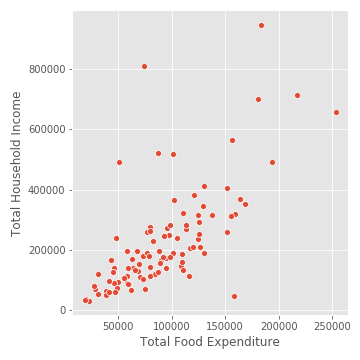

In [60]:
sns.relplot(x = 'Total Food Expenditure', y = 'Total Household Income', data = var_quant)

Esta mesma população tende a gastar menos que 20.000 em restaurantes e hoteis

<IPython.core.display.Javascript object>


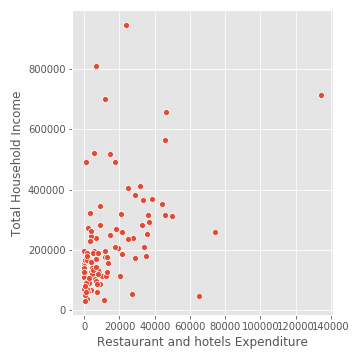

In [59]:
sns.relplot(x = 'Restaurant and hotels Expenditure', y = 'Total Household Income', data = var_quant)

Curiosamente a renda familiar total tem baixa correlação com o consumo dos alimentos. Sendo a maior correlação com despesas com carne

<IPython.core.display.Javascript object>


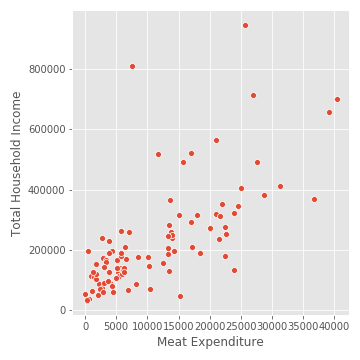

In [56]:
sns.relplot(x = 'Meat Expenditure', y = 'Total Household Income', data = var_quant)

A população com renda menor que 200.000 e que gastam menos que 100.000 em alimentos, tendem a não ter refrigeradores em seus domicilios. Com gastos acima de 100.000, independente da renda, o número de refrigeradores é maior ou igual a 1.

<IPython.core.display.Javascript object>


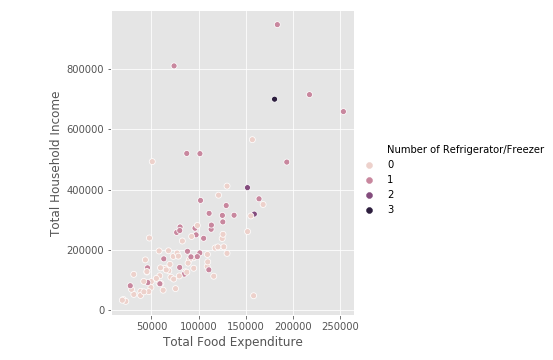

In [55]:
sns.relplot(x = 'Total Food Expenditure', y = 'Total Household Income', hue = 'Number of Refrigerator/Freezer', data = var_quant, );

A média de gastos familiares com comida tende ser maior com familias com 1 refrigerador, como esperado.

<IPython.core.display.Javascript object>


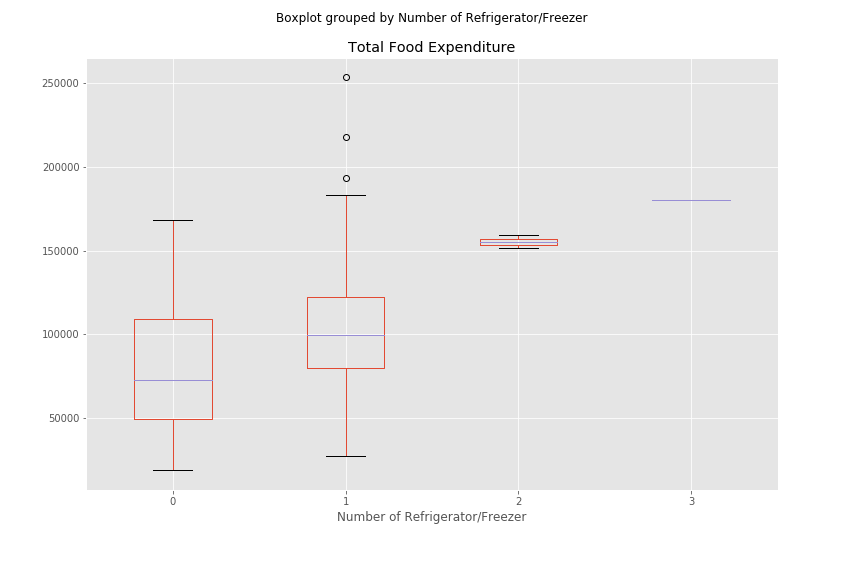

In [53]:
%matplotlib notebook
var_quant.boxplot(column='Total Food Expenditure', by='Number of Refrigerator/Freezer', figsize =(12,8))

O consumo de carne tende a acompanhar o gasto com alimento e restaurantes e hoteis

<IPython.core.display.Javascript object>


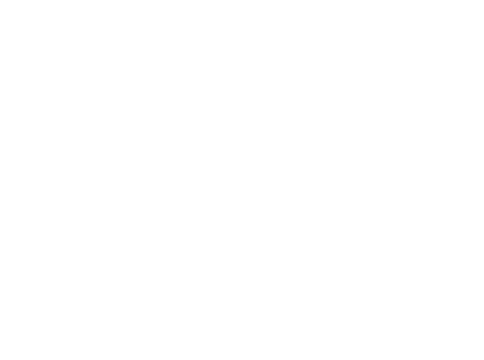

In [30]:
sns.relplot(x = 'Total Food Expenditure', y = 'Restaurant and hotels Expenditure', hue = 'Meat Expenditure', data = var_quant);

Avaliação de alguns bens em função da renda

In [31]:
var_categ = sample_df[['Total Household Income', 'Household Head Highest Grade Completed', 'Total Number of Family members', 'Main Source of Income', 'Region', 'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Members with age less than 5 year old',
       'Total number of family members employed', 'Type of Building/House',
       'Type of Roof', 'Type of Walls', 'Electricity', 'Number of Television',
       'Number of Refrigerator/Freezer', 'Number of Washing Machine',
       'Number of Airconditioner', 'Number of Car, Jeep, Van',
       'Number of Cellular phone',
       'Number of Personal Computer', 'Number of Stove with Oven/Gas Range']]

In [32]:
var_categ

,Total Household Income,Household Head Highest Grade Completed,Total Number of Family members,Main Source of Income,Region,Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,...,Type of Walls,Electricity,Number of Television,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range
32948,127840,High School Graduate,13,Wage/Salaries,XII - SOCCSKSARGEN,10560,1800,209,1440,888,...,Light,1,1,0,0,0,0,1,0,0
41058,89147,Business and Administration Programs,3,Enterpreneurial Activities,XI - Davao Region,8790,4200,300,1776,1722,...,Very Light,1,1,0,0,0,0,1,0,0
8258,276130,Elementary Graduate,4,Enterpreneurial Activities,V - Bicol Region,41898,6000,4680,12792,1680,...,Strong,1,1,1,0,0,0,3,0,0
13328,238647,Engineering and Engineering Trades Programs,8,Wage/Salaries,I - Ilocos Region,11220,6000,13121,7740,3000,...,Strong,1,1,1,0,0,0,2,0,0
16332,268516,High School Graduate,4,Other sources of Income,I - Ilocos Region,24948,12000,2966,6408,3642,...,Strong,1,0,1,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,251846,Grade 6,11,Wage/Salaries,V - Bicol Region,27042,12000,11841,9816,4680,...,Strong,1,0,0,1,0,0,4,0,0
16514,698754,Teacher Training and Education Sciences Programs,3,Enterpreneurial Activities,I - Ilocos Region,91458,48000,16618,25158,16782,...,Strong,1,2,3,2,0,0,2,3,0
27412,210110,Grade 3,7,Wage/Salaries,III - Central Luzon,21030,13200,818,9576,2286,...,Light,1,1,0,1,0,0,3,0,0
6925,264445,Elementary Graduate,8,Other sources of Income,V - Bicol Region,81432,72000,200,4866,576,...,Strong,1,1,1,1,0,0,1,0,0


Quase 45% da renda das familias é proveniente de salários e aproximadamente 25% da renda familiar é proveniente de atividades empreendedoras

<IPython.core.display.Javascript object>


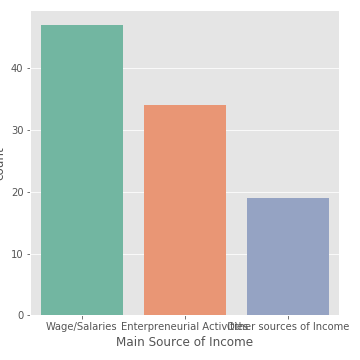

In [52]:
sns.catplot(x = 'Main Source of Income', kind="count", palette = "Set2", data = var_categ);

Não foi observada correlação entre as variaveis

In [34]:
var_categ.corr()

,Total Household Income,Total Number of Family members,Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,...,Total number of family members employed,Electricity,Number of Television,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range
Total Household Income,1.000000,0.038279,0.776962,0.678267,0.569484,0.732753,0.786237,0.447303,-0.126928,0.222786,...,0.227081,0.254151,0.541431,0.507472,0.496108,0.414623,0.613709,0.571946,0.533898,0.566813
Total Number of Family members,0.038279,1.000000,-0.095721,-0.065079,-0.056471,0.062443,-0.050074,-0.053054,-0.063717,-0.109955,...,0.487115,-0.082473,-0.033995,-0.102918,0.031957,-0.170063,-0.075181,0.266260,-0.077987,-0.075158
Housing and water Expenditure,0.776962,-0.095721,1.000000,0.798514,0.407597,0.563998,0.769465,0.449137,-0.118238,0.145149,...,0.093340,0.260653,0.502898,0.515710,0.478492,0.659556,0.544284,0.363521,0.290508,0.611572
Imputed House Rental Value,0.678267,-0.065079,0.798514,1.000000,0.367264,0.503382,0.595788,0.164141,-0.044228,0.128973,...,0.048068,0.225877,0.510373,0.468508,0.523912,0.248658,0.582523,0.361785,0.220931,0.447093
Medical Care Expenditure,0.569484,-0.056471,0.407597,0.367264,1.000000,0.259621,0.503591,0.193669,0.039661,0.008111,...,0.020172,0.082101,0.237533,0.124548,0.165033,0.228425,0.604874,0.268885,0.261864,0.543961
Transportation Expenditure,0.732753,0.062443,0.563998,0.503382,0.259621,1.000000,0.620283,0.521660,-0.194374,-0.081403,...,0.302782,0.211566,0.427211,0.356281,0.464191,0.317049,0.465354,0.451316,0.484667,0.496432
Communication Expenditure,0.786237,-0.050074,0.769465,0.595788,0.503591,0.620283,1.000000,0.538728,-0.204762,0.075360,...,0.160121,0.223495,0.498554,0.529245,0.387112,0.529645,0.518496,0.502860,0.505487,0.669893
Education Expenditure,0.447303,-0.053054,0.449137,0.164141,0.193669,0.521660,0.538728,1.000000,-0.083930,-0.036884,...,0.057183,0.091742,0.170688,0.252905,0.117280,0.603630,0.122337,0.260776,0.462572,0.415916
Crop Farming and Gardening expenses,-0.126928,-0.063717,-0.118238,-0.044228,0.039661,-0.194374,-0.204762,-0.083930,1.000000,0.233504,...,-0.304602,-0.198861,-0.060544,-0.174859,-0.137586,-0.093896,-0.083039,-0.239036,-0.111255,-0.159880
Total Income from Entrepreneurial Acitivites,0.222786,-0.109955,0.145149,0.128973,0.008111,-0.081403,0.075360,-0.036884,0.233504,1.000000,...,-0.453023,0.097448,0.298219,0.497772,0.332700,0.091955,-0.118538,0.085268,0.269520,-0.036593


In [35]:
cf.go_offline()

A maior parte das pessoas amostradas são provenientes da região de Calabarzon, maior região das Filipinas, região de base agrícola.

In [36]:
var_categ['Region'].value_counts().iplot(kind='bar')

In [67]:
var_categ['Household Head Highest Grade Completed'].value_counts()

Elementary Graduate                                 25
High School Graduate                                17
Grade 3                                              9
Second Year High School                              8
Third Year College                                   5
Grade 1                                              4
Business and Administration Programs                 3
Third Year High School                               3
Teacher Training and Education Sciences Programs     3
Grade 4                                              3
First Year College                                   2
Grade 2                                              2
Grade 5                                              2
No Grade Completed                                   2
Engineering and Engineering Trades Programs          2
Second Year College                                  2
First Year High School                               2
Transport Services Programs                          2
Security S

In [77]:
def transforma_ensino(x):
    if x == 'Elementary Graduate' or x == 'Grade 1' or x == 'Grade 2' or x == 'Grade 3' or x == 'Grade 4' or x == 'Grade 5' or x == 'Grade 6':
        return 'Ensino Fundamental'
    elif x == 'High School Graduate' or x == 'Third Year High School' or x == 'Second Year High School' or x == 'First Year High School':
        return'Ensino Médio'
    elif x == 'Third Year College' or x == 'Second Year College' or x == 'First Year College':
        return 'Ensino Superior'
    else:
        return 'Outros'

In [ ]:
def status_ensino(x):
    if x == 'Elementary Graduate' or x == 'High School Graduate' or High School Graduate:
        return '1'

In [80]:
var_categ.head(50)

,Total Household Income,Household Head Highest Grade Completed,Total Number of Family members,Main Source of Income,Region,Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,...,Electricity,Number of Television,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Escolaridade
32948,127840,High School Graduate,13,Wage/Salaries,XII - SOCCSKSARGEN,10560,1800,209,1440,888,...,1,1,0,0,0,0,1,0,0,Ensino Médio
41058,89147,Business and Administration Programs,3,Enterpreneurial Activities,XI - Davao Region,8790,4200,300,1776,1722,...,1,1,0,0,0,0,1,0,0,Outros
8258,276130,Elementary Graduate,4,Enterpreneurial Activities,V - Bicol Region,41898,6000,4680,12792,1680,...,1,1,1,0,0,0,3,0,0,Ensino Fundamental
13328,238647,Engineering and Engineering Trades Programs,8,Wage/Salaries,I - Ilocos Region,11220,6000,13121,7740,3000,...,1,1,1,0,0,0,2,0,0,Outros
16332,268516,High School Graduate,4,Other sources of Income,I - Ilocos Region,24948,12000,2966,6408,3642,...,1,0,1,0,0,0,2,0,0,Ensino Médio
39694,174106,Elementary Graduate,5,Wage/Salaries,NCR,33996,0,278,9288,1656,...,1,1,0,1,0,0,2,0,0,Ensino Fundamental
5131,492271,High School Graduate,2,Other sources of Income,III - Central Luzon,41130,14400,260114,1614,2100,...,1,1,0,0,0,0,1,0,0,Ensino Médio
38505,564849,Second Year High School,8,Wage/Salaries,NCR,52338,24000,2877,47124,3276,...,1,1,0,1,0,0,3,0,0,Ensino Médio
19043,75820,Second Year High School,6,Wage/Salaries,VIII - Eastern Visayas,6822,4800,603,7080,0,...,1,0,0,0,0,0,0,0,0,Ensino Médio
34940,152515,First Year College,5,Enterpreneurial Activities,ARMM,12720,6600,195,4560,444,...,1,0,0,0,0,0,1,0,0,Ensino Superior


In [78]:
var_categ['Escolaridade'] = var_categ['Household Head Highest Grade Completed'].apply(transforma_ensino)

A maior parte das familias possuem graus de escolaridade baixos

In [79]:
var_categ['Escolaridade'].value_counts().iplot(kind='bar')

In [37]:
var_categ['Household Head Highest Grade Completed'].value_counts().iplot(kind='bar')

Não parece ter diferença significativa entre as fontes de renda das familias quando considerada as suas rendas.

<IPython.core.display.Javascript object>


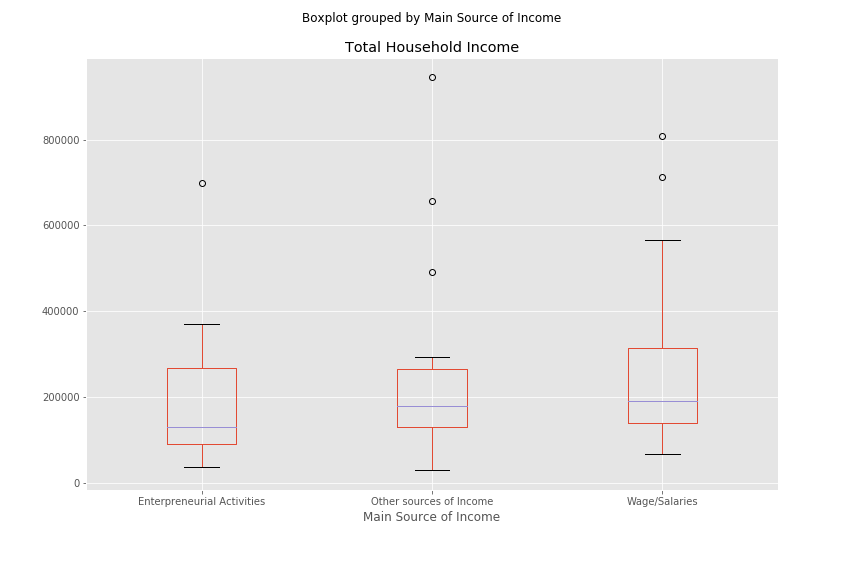

In [45]:
%matplotlib notebook
var_categ.boxplot(column='Total Household Income', by='Main Source of Income',figsize =(12,8))
plt.show()

O gráfico de box plot abaixo mostra que as rendas maiores são das familias cuja formação é administração em relação aos outros graus de formação

<IPython.core.display.Javascript object>


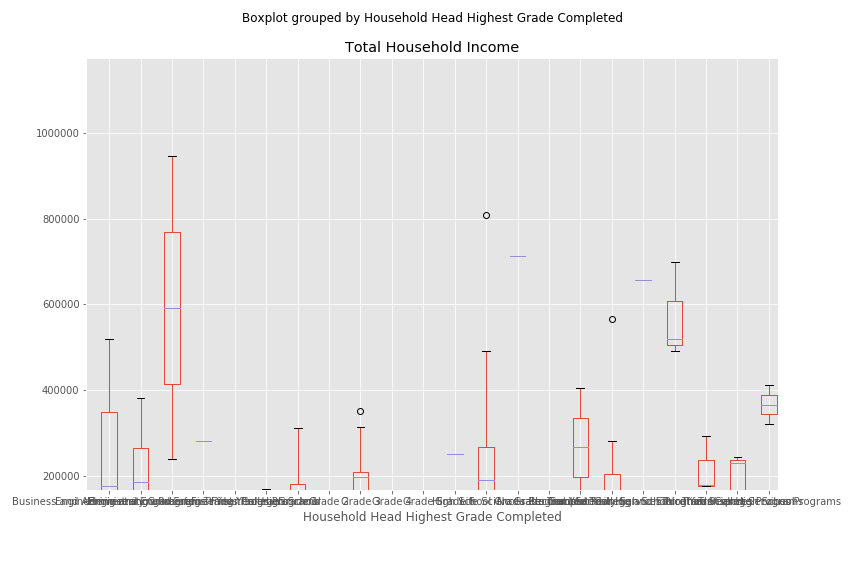

In [46]:
%matplotlib notebook
var_categ.boxplot(column='Total Household Income', by='Household Head Highest Grade Completed', 
figsize =(12,8))
plt.show()

In [ ]:
# bootstrap em 20.000 amostras em vez de apenas 10.000  
CIs = bootstrap.ci(treatment1, scipy.mean, n_samples=20000)  
print "Intervalos de confiança de 95% pelo Bootstrapped  com 20.000,000 amostras\nLow:", CIs[0], "\nHigh:", CIs[1]